In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('mpg.csv')
%matplotlib inline

In [2]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.shape

(398, 9)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [5]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [6]:
df = df.drop('name', axis=1)

In [7]:
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

df = pd.get_dummies(df, columns=['origin'])

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


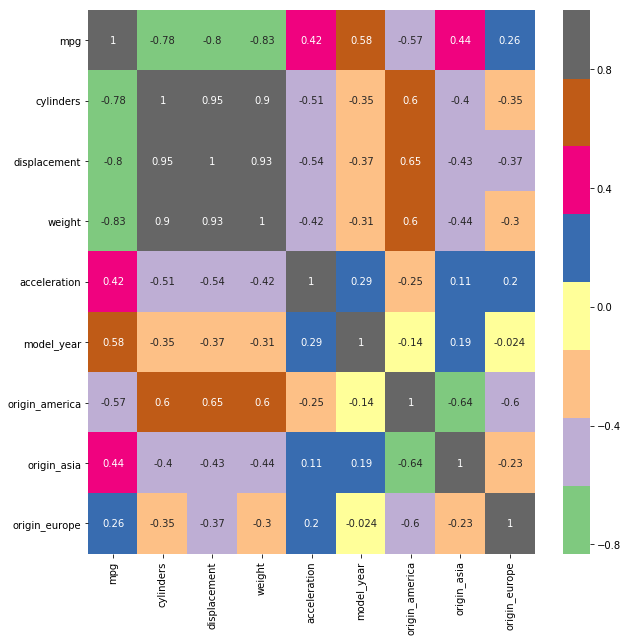

In [8]:
cm = df.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(cm,cmap='Accent',annot = True)
plt.show()

In [9]:
import numpy as np

df = df.replace('?', np.nan)
df = df.dropna()

In [10]:
X = df.drop('mpg', axis=1)
y = df[['mpg']]

In [11]:
df['horsepower'] = df['horsepower'].astype(float)

## Data Visualization

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('mpg.csv')
data = data.drop('name', axis=1)

data = data.replace('?', np.nan)
data = data.dropna()

data['horsepower'] = data['horsepower'].astype(float)

%matplotlib inline

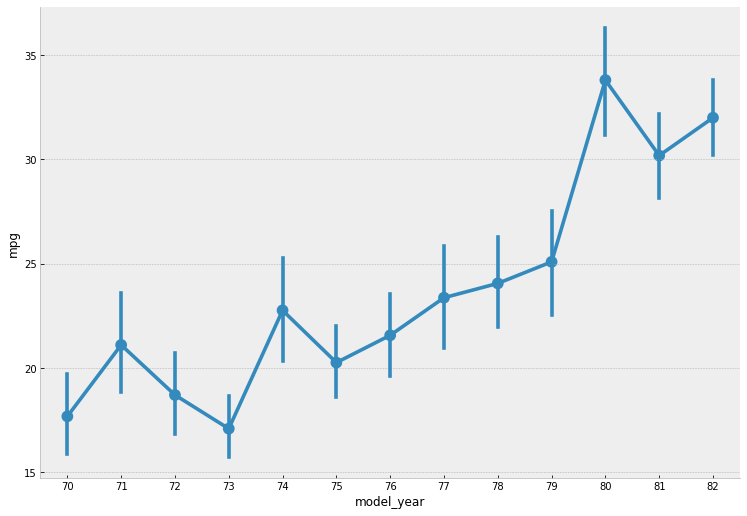

In [13]:
plt.style.use('bmh')
sns.factorplot(data=data, x="model_year", y="mpg").fig.set_size_inches(12,8)

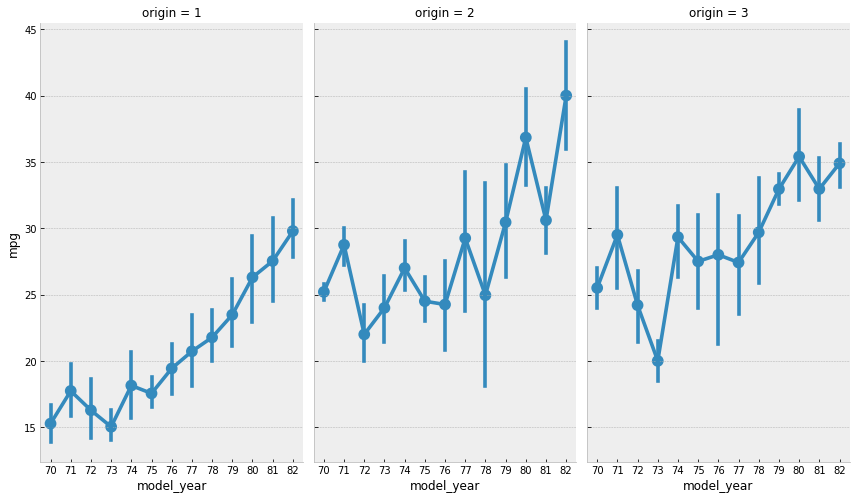

In [14]:
sns.factorplot(data=data, x="model_year", y="mpg", col="origin").fig.set_size_inches(12,8)

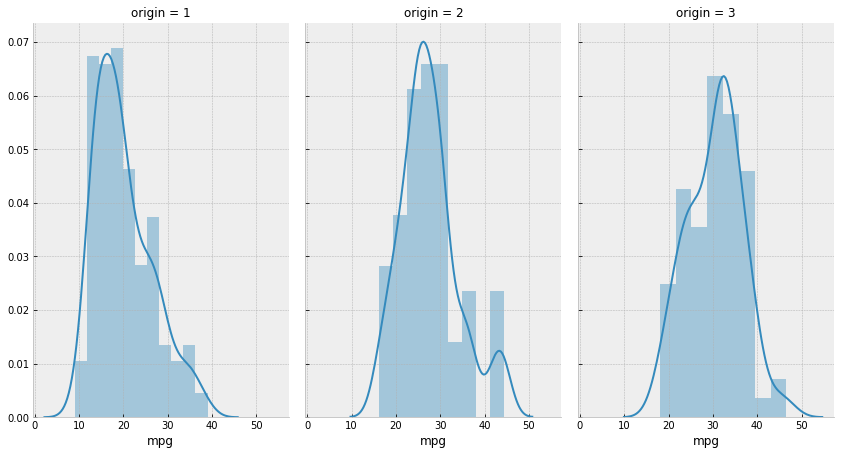

In [15]:
g = sns.FacetGrid(data, col="origin") 
g.map(sns.distplot, "mpg").fig.set_size_inches(12,8)

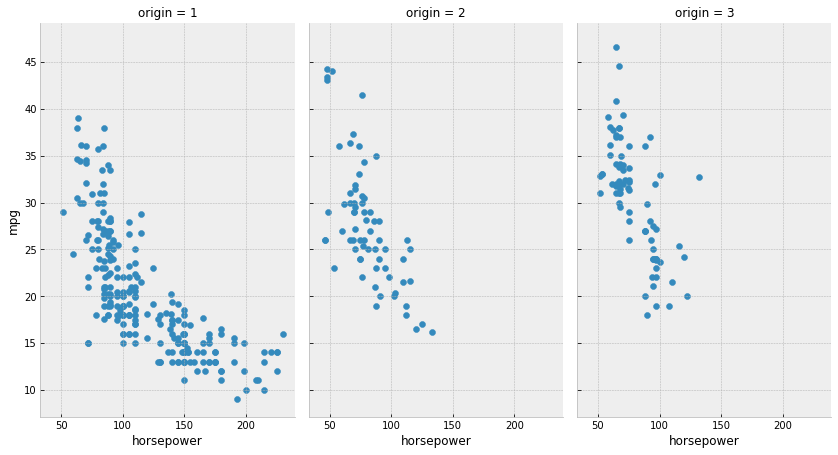

In [16]:
g = sns.FacetGrid(data, col="origin") 
g.map(plt.scatter, "horsepower", "mpg").fig.set_size_inches(12,8)

(0, 60)

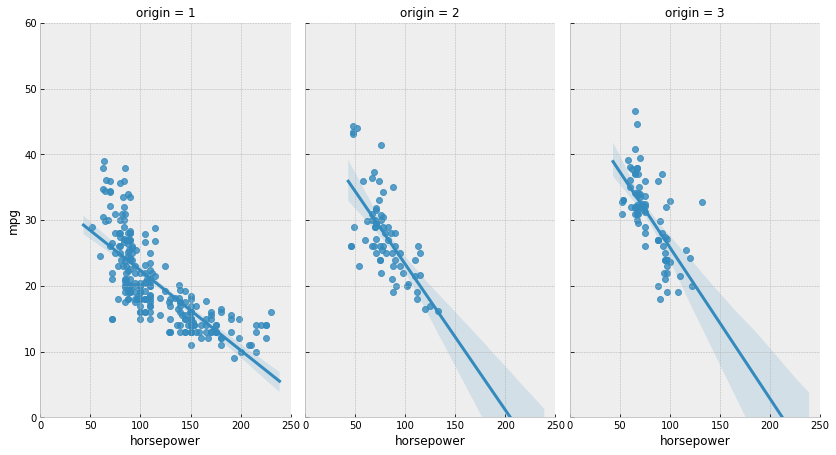

In [17]:
g = sns.FacetGrid(data, col="origin") 
g.map(sns.regplot, "horsepower", "mpg").fig.set_size_inches(12,8)
plt.xlim(0, 250) 
plt.ylim(0, 60)

In [18]:
import warnings; warnings.simplefilter('ignore')

(0, 60)

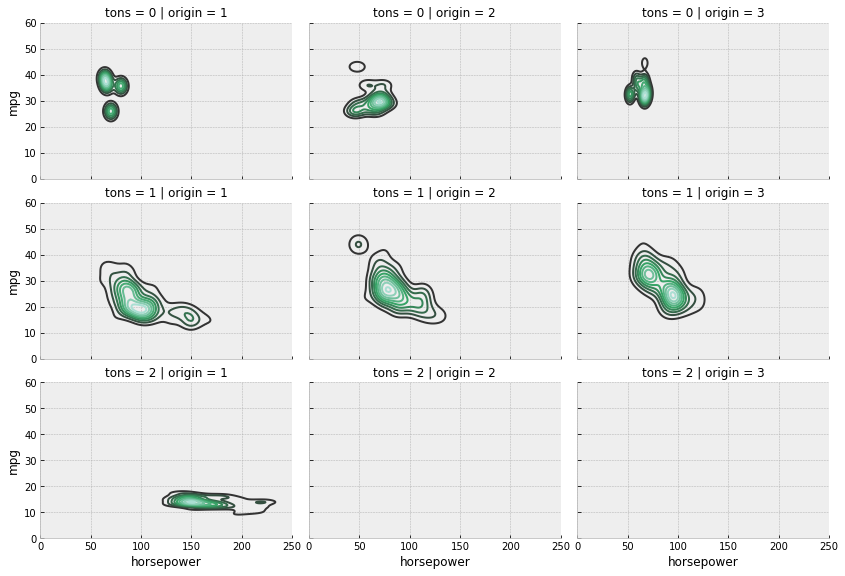

In [19]:
data['tons'] = (data.weight/2000).astype(int) 
g = sns.FacetGrid(data, col="origin", row="tons") 
g.map(sns.kdeplot, "horsepower", "mpg").fig.set_size_inches(12,8)
plt.xlim(0, 250) 
plt.ylim(0, 60)

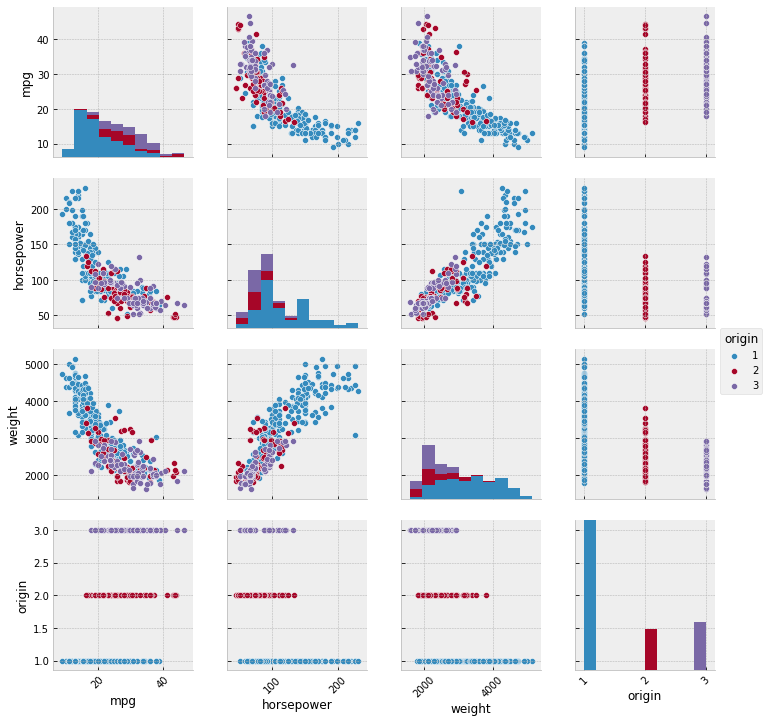

In [20]:
g = sns.pairplot(data[["mpg", "horsepower", "weight", "origin"]], hue="origin", diag_kind="hist")
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

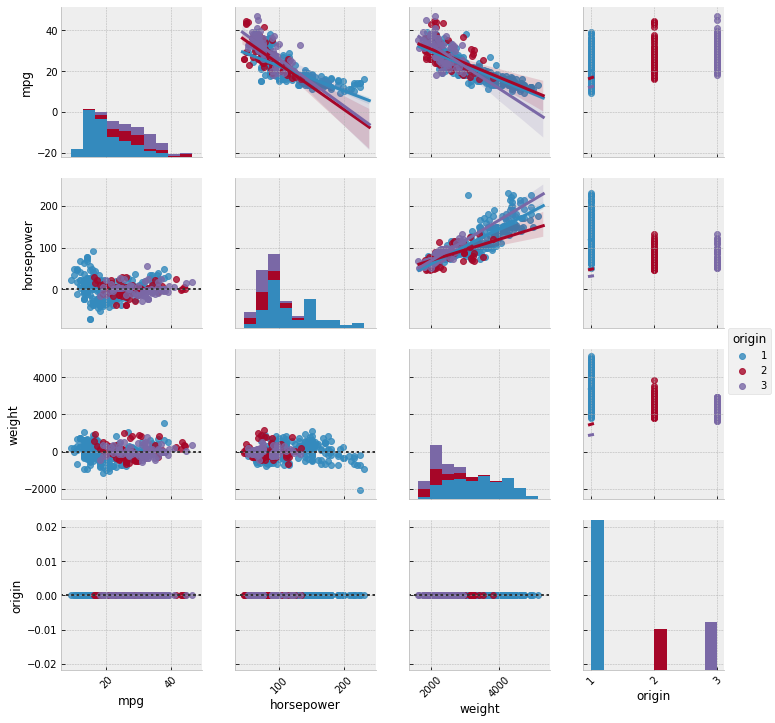

In [21]:
g = sns.PairGrid(data[["mpg", "horsepower", "weight", "origin"]], hue="origin")
g.map_upper(sns.regplot) 
g.map_lower(sns.residplot) 
g.map_diag(plt.hist) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)

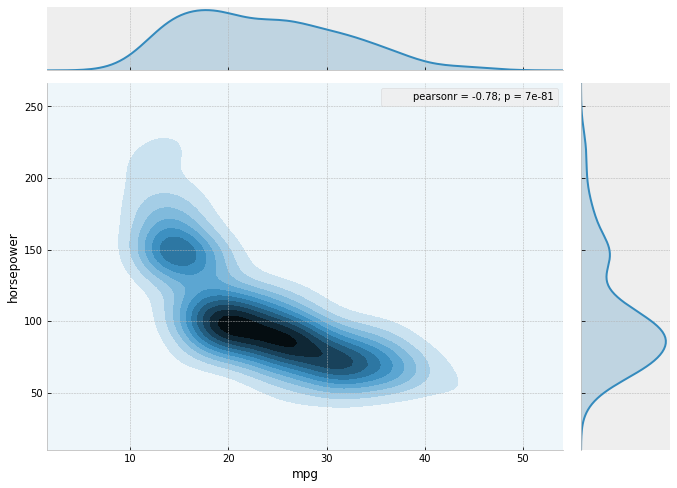

In [22]:
sns.jointplot("mpg", "horsepower", data=df, kind='kde').fig.set_size_inches(10,7)

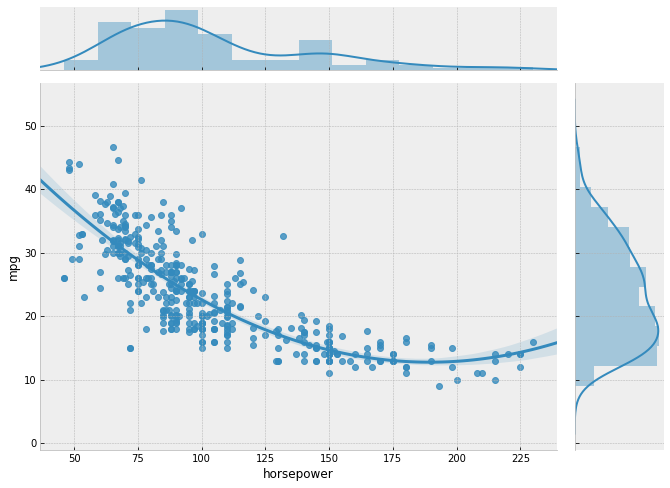

In [23]:
g = sns.JointGrid(x="horsepower", y="mpg", data=df) 
g.plot_joint(sns.regplot, order=2) 
g.plot_marginals(sns.distplot).fig.set_size_inches(10,7)

## Split Data

In [24]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Train Model

In [25]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)

In [26]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.24633755869962165
The coefficient for displacement is 0.023870338307149644
The coefficient for horsepower is -0.006017238617773304
The coefficient for weight is -0.007336432943899309
The coefficient for acceleration is 0.21897778104124832
The coefficient for model_year is 0.7851801072779492
The coefficient for origin_america is -1.7624934092199307
The coefficient for origin_asia is 0.8096269190858509
The coefficient for origin_europe is 0.9528664901340742


In [27]:
# Analyzing the Linear Regression Coefficients
coef = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regression_model.coef_))], axis = 1)
coef.columns = ['Column Name', 'Coefficients']
coef.sort_values('Coefficients')

coef['sort'] = coef['Coefficients'].abs()
coef.sort_values(['sort'], ascending=[False])

,Column Name,Coefficients,sort
6,origin_america,-1.762493,1.762493
8,origin_europe,0.952866,0.952866
7,origin_asia,0.809627,0.809627
5,model_year,0.785180,0.785180
0,cylinders,-0.246338,0.246338
4,acceleration,0.218978,0.218978
1,displacement,0.023870,0.023870
3,weight,-0.007336,0.007336
2,horsepower,-0.006017,0.006017


In [28]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -19.80918384881586


In [29]:
print("Train score : ",regression_model.score(X_train , y_train) )
print("Test score : ", regression_model.score(X_test, y_test) )

Train score :  0.8195543543
Test score :  0.828523131646


In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("R^2: {}".format(regression_model.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean absolute error (MAE): %.2f"
      % mean_absolute_error(y_test, y_pred))

print("Mean squared error (MSE): %.2f"
      % mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE): {}".format(rmse))

Variance score: 0.83
R^2: 0.8285231316459774
Mean absolute error (MAE): 2.69
Mean squared error (MSE): 12.23
Root Mean Squared Error (RMSE): 3.4972794904900963


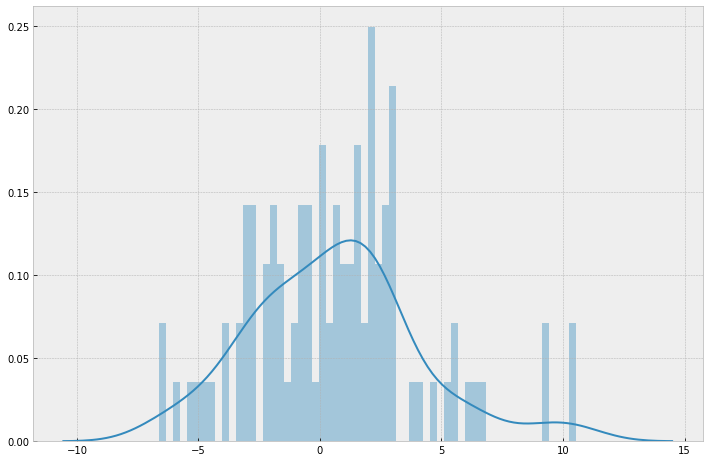

In [31]:
#Plotting residuals
sns.distplot((y_test-y_pred), bins=60)
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.show()

In [32]:
# Using Cross validation to get a more reliable score (validation score)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(regression_model, X_train, y_train, cv = 5)
print("Cross Validation Scores: " + str(scores))
print("Mean Cross Validation Score: " + str(scores.mean()))

Cross Validation Scores: [ 0.81943636  0.76761667  0.8010767   0.79511988  0.81236717]
Mean Cross Validation Score: 0.799123357289


## Using Normalizer

In [33]:
import pandas as pd
df = pd.read_csv('mpg.csv')
df = df.drop('name', axis=1)

df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df = pd.get_dummies(df, columns=['origin'])

import numpy as np
df = df.replace('?', np.nan)
df = df.dropna()

X = df.drop('mpg', axis=1)
y = df[['mpg']]

df['horsepower'] = df['horsepower'].astype(float)

In [34]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [35]:
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)

In [37]:
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -452.2470747573408
The coefficient for displacement is -169.78624971795878
The coefficient for horsepower is -195.71641538242994
The coefficient for weight is -2557.5854317649732
The coefficient for acceleration is 259.1800050932523
The coefficient for model_year is 2043.4016035153527
The coefficient for origin_america is -112339.9443161983
The coefficient for origin_asia is -110482.69887988268
The coefficient for origin_europe is -109184.39291296426


In [38]:
# Analyzing the Linear Regression Coefficients
coef = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regression_model.coef_))], axis = 1)
coef.columns = ['Column Name', 'Coefficients']
coef.sort_values('Coefficients')

coef['sort'] = coef['Coefficients'].abs()
coef.sort_values(['sort'], ascending=[False])

,Column Name,Coefficients,sort
6,origin_america,-112339.944316,112339.944316
7,origin_asia,-110482.698880,110482.698880
8,origin_europe,-109184.392913,109184.392913
3,weight,-2557.585432,2557.585432
5,model_year,2043.401604,2043.401604
0,cylinders,-452.247075,452.247075
4,acceleration,259.180005,259.180005
2,horsepower,-195.716415,195.716415
1,displacement,-169.786250,169.786250


In [39]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2573.362809752594


In [40]:
print("Train score : ",regression_model.score(X_train , y_train) )
print("Test score : ", regression_model.score(X_test, y_test) )

Train score :  0.864976071823
Test score :  0.852805162809


In [41]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("R^2: {}".format(regression_model.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean absolute error (MAE): %.2f"
      % mean_absolute_error(y_test, y_pred))

print("Mean squared error (MSE): %.2f"
      % mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE): {}".format(rmse))

Variance score: 0.85
R^2: 0.8528051628087545
Mean absolute error (MAE): 2.17
Mean squared error (MSE): 10.50
Root Mean Squared Error (RMSE): 3.2402152228076635


##### Looking at the above parameters, we can say this seems like a good model

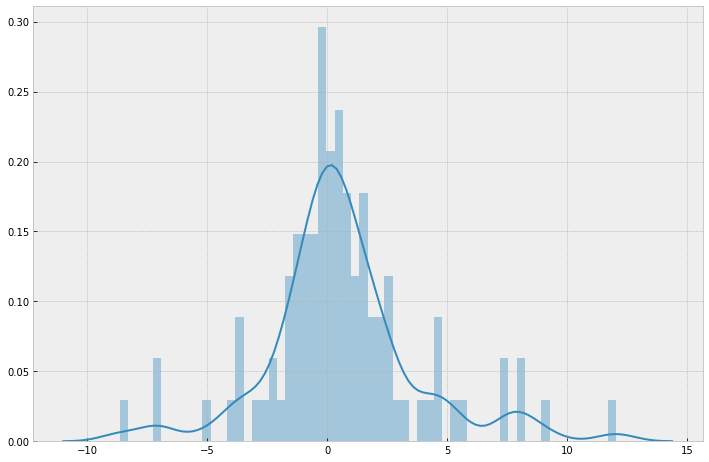

In [42]:
#Plotting residuals
sns.distplot((y_test-y_pred), bins=60)
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.show()

In [43]:
# Using Cross validation to get a more reliable score (validation score)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(regression_model, X_train, y_train, cv = 5)
print("Cross Validation Scores: " + str(scores))
print("Mean Cross Validation Score: " + str(scores.mean()))

Cross Validation Scores: [ 0.85725334  0.79080652  0.85943838  0.86978802  0.86967563]
Mean Cross Validation Score: 0.849392379533


## Using OLS method

##### Although we have got good results using scikit-learn, let us explore another way of doing the regression

In [44]:
data = pd.read_csv('mpg.csv')
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [45]:
data = data.drop('name', axis=1)

In [46]:
data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

data = pd.get_dummies(data, columns=['origin'])

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [47]:
import numpy as np

data = data.replace('?', np.nan)
data = data.dropna()

In [48]:
data.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model_year          int64
origin_america      int64
origin_asia         int64
origin_europe       int64
dtype: object

In [49]:
data['horsepower'] = data['horsepower'].astype(float)

In [50]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings; warnings.simplefilter('ignore')

In [51]:
model = smf.ols(formula = " mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year + origin_america + origin_asia + origin_europe", data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Fri, 09 Mar 2018   Prob (F-statistic):          1.79e-139
Time:                        17:45:21   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -12.0951      3.482     -3.474      0.001     -18.941      -5.250
cylinders         -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement       0.0240      0.008      3.133      0.002       0.009       0.039
horsepower        -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight            -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration       0.0791      0.098      0.805      0.421      -0.114       0.272
model_year         0.7770      0.052     15.005      0.000       0.675       0.879
origin_america    -5.8595      1.227     -4.775      0.000      -8.272      -3.447
origin_asia       -3.0062      1.231     -2.443      0.015      -5.426      -0.587
origin_europe     -3.2295      1.156     -2.794      0.005      -5.502      -0.957
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     2.53e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.93e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
model = smf.ols(formula = " mpg ~ cylinders + acceleration + model_year + origin_america + origin_asia + origin_europe", data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     219.5
Date:                Fri, 09 Mar 2018   Prob (F-statistic):          1.82e-110
Time:                        17:48:29   Log-Likelihood:                -1097.3
No. Observations:                 392   AIC:                             2207.
Df Residuals:                     386   BIC:                             2230.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -15.4143      3.728     -4.134      0.000     -22.745      -8.084
cylinders         -2.4516      0.174    -14.109      0.000      -2.793      -2.110
acceleration       0.0090      0.087      0.104      0.917      -0.161       0.179
model_year         0.7650      0.060     12.682      0.000       0.646       0.884
origin_america    -7.1235      1.354     -5.262      0.000      -9.785      -4.462
origin_asia       -3.4686      1.305     -2.659      0.008      -6.034      -0.903
origin_europe     -4.8222      1.231     -3.918      0.000      -7.242      -2.402
==============================================================================
Omnibus:                       20.417   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.660
Skew:                           0.376   Prob(JB):                     1.33e-07
Kurtosis:                       4.172   Cond. No.                     4.94e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.74e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""